In [1]:
# visualization - compare with physics-based model (CAMS) + emission

import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
from datetime import datetime, timedelta


In [3]:
# read data
path_eac4 = "/HDD/global/EAC4_pm2p5_aod550/global_2019-2022.nc"
path_refer = "/HDD/global/refer/refer-{}.npy"
# path_pred = "/DATA/global-emission-2-iniCAMS/start_{}/pred-{}.npy"
# path_pred = "/DATA/global-emission-2_11-17_iniCAMS_iAOD/pred/start_{}/pred-{}.npy"
# path_pred = "/DATA/global-emission_gfas_2_11-17_iniCAMS/pred/start_{}/pred-{}.npy"
path_pred = "/DATA/global-emission-2_11-17_iniCAMS_iAOD/pred/start_{}/pred-{}.npy"
# path_cams = "/HDD/CAMS/date_2019-01-01_time_12:00:00.nc"       #5-days-ahead prediction
path_cams = "/DATA/CAMS/cams_resample/start_{}/cams-{}.npy"
# path_fig = '/home/sc3020/OneDrive/Paper/Paper4/Figure/2023-12-10/'
path_fig = '/home/sc3020/OneDrive/Paper/Paper4/Nature/submittion2/Figures2_iAOD/'

In [4]:
nc_file_eac4 = nc.Dataset(path_eac4)
times_nc = nc_file_eac4.variables['time']
nt = len(times_nc)
lon_eac4 = nc_file_eac4.variables['longitude'][:]
lat_eac4 = nc_file_eac4.variables['latitude'][:]
lon_eac4_grid, lat_eac4_grid = np.meshgrid(lon_eac4, lat_eac4)
print(lon_eac4_grid.shape)

# use data on 2018 for training and validation
dates_eac4 = nc.num2date(times_nc[:], times_nc.units, calendar=times_nc.calendar)
formated_dates_eac4 = [date.strftime('%Y-%m-%d %H:%M:%S') for date in dates_eac4]
print('training & validation:', formated_dates_eac4[4], '--', formated_dates_eac4[-1])

(241, 480)
training & validation: 2019-01-01 12:00:00 -- 2022-12-31 21:00:00


In [5]:
nt = 40 # 5 days ahead

RMSE_pm2p5 = []
RMSE_aod550 = []
CC_pm2p5 = []
CC_aod550 = []

RMSE_CAMS_pm2p5 = []
RMSE_CAMS_aod550 = []
CC_CAMS_pm2p5 = []
CC_CAMS_aod550 = []

start = dates_eac4[4]
print(start)
dates_plot = []
for ahead in range(1, nt+1):
    
    current = start + timedelta(hours=3*ahead)
    dates_plot.append(current)
    
    # refer
    filename = path_refer.format(current.strftime('%Y%m%d%H'))
    refer = np.load(filename)
    print(filename)
    print(refer.shape)
    
    # prediction
    filename = path_pred.format(start.strftime('%Y%m%d%H'), current.strftime('%Y%m%d%H'))
    pred = np.load(filename)
    print(filename)
    print(pred.shape)
    
    # metrics
    index = 0
    rmse_pm2p5 = np.sqrt(np.mean((refer[...,index] - pred[...,index])**2))
    cc_pm2p5 = np.corrcoef(refer[...,index].flatten(), pred[...,index].flatten())[0, 1]
    RMSE_pm2p5.append(rmse_pm2p5)
    CC_pm2p5.append(cc_pm2p5)
    
    index = 1
    rmse_aod550 = np.sqrt(np.mean((refer[...,index] - pred[...,index])**2))
    cc_aod550 = np.corrcoef(refer[...,index].flatten(), pred[...,index].flatten())[0, 1]
    RMSE_aod550.append(rmse_aod550)
    CC_aod550.append(cc_aod550)
    
    # ----------------------------------------------------------
    
    # from CAMS - Physically-based model
    filename = path_cams.format(start.strftime('%Y%m%d%H'), current.strftime('%Y%m%d%H'))
    cams = np.load(filename)
    print(cams.shape)
    
    index = 0
    rmse_pm2p5 = np.sqrt(np.mean((refer[...,index] - cams[...,index])**2))
    cc_pm2p5 = np.corrcoef(refer[...,index].flatten(), cams[...,index].flatten())[0, 1]
    index = 1
    rmse_aod550 = np.sqrt(np.mean((refer[...,index] - cams[...,index])**2))
    cc_aod550 = np.corrcoef(refer[...,index].flatten(), cams[...,index].flatten())[0, 1]
    
    RMSE_CAMS_pm2p5.append(rmse_pm2p5)
    CC_CAMS_pm2p5.append(cc_pm2p5)

2019-01-01 12:00:00
/HDD/global/refer/refer-2019010115.npy
(241, 480, 2)
/DATA/global-emission-2_11-17_iniCAMS_iAOD/pred/start_2019010112/pred-2019010115.npy
(241, 480, 2)
(241, 480, 2)
/HDD/global/refer/refer-2019010118.npy
(241, 480, 2)
/DATA/global-emission-2_11-17_iniCAMS_iAOD/pred/start_2019010112/pred-2019010118.npy
(241, 480, 2)
(241, 480, 2)
/HDD/global/refer/refer-2019010121.npy
(241, 480, 2)
/DATA/global-emission-2_11-17_iniCAMS_iAOD/pred/start_2019010112/pred-2019010121.npy
(241, 480, 2)
(241, 480, 2)
/HDD/global/refer/refer-2019010200.npy
(241, 480, 2)
/DATA/global-emission-2_11-17_iniCAMS_iAOD/pred/start_2019010112/pred-2019010200.npy
(241, 480, 2)
(241, 480, 2)
/HDD/global/refer/refer-2019010203.npy
(241, 480, 2)
/DATA/global-emission-2_11-17_iniCAMS_iAOD/pred/start_2019010112/pred-2019010203.npy
(241, 480, 2)
(241, 480, 2)
/HDD/global/refer/refer-2019010206.npy
(241, 480, 2)
/DATA/global-emission-2_11-17_iniCAMS_iAOD/pred/start_2019010112/pred-2019010206.npy
(241, 480, 2

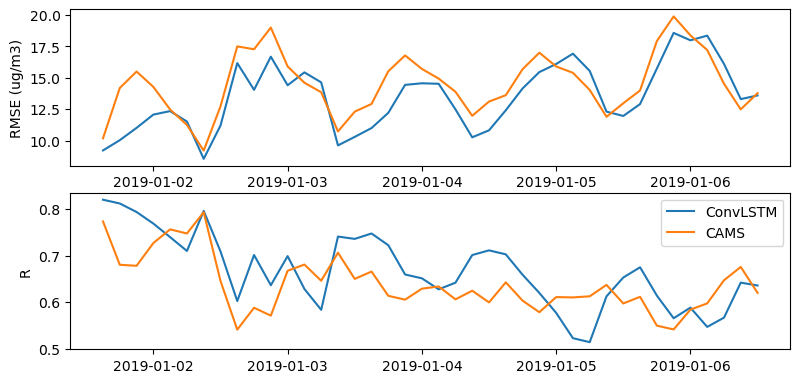

In [6]:
nt = 40
dates_plot = [datetime.fromisoformat(str(date)) for date in dates_plot]
fig, axs = plt.subplots(2, 1, figsize=(8, 4))

RMSE_pm2p5 = np.array(RMSE_pm2p5)*1e9
RMSE_CAMS_pm2p5 = np.array(RMSE_CAMS_pm2p5)*1e9

axs[0].plot(dates_plot, RMSE_pm2p5)
axs[0].plot(dates_plot, RMSE_CAMS_pm2p5)
axs[0].set_ylabel('RMSE (ug/m3)')
axs[1].plot(dates_plot, np.array(CC_pm2p5)**2)
axs[1].plot(dates_plot, np.array(CC_CAMS_pm2p5)**2)
axs[1].set_ylabel('R')
plt.legend(['ConvLSTM', 'CAMS'])

plt.subplots_adjust(wspace=0.02, hspace=0.17, left=0.05, right=0.95, top=0.9, bottom=0.05)

# path_fig = '/home/sc3020/OneDrive/Paper/Paper4/Figure/'
# filename = path_fig+'compare_ConvLSTM_CAMS.png'
# fig.savefig(filename, dpi=300)
plt.show()

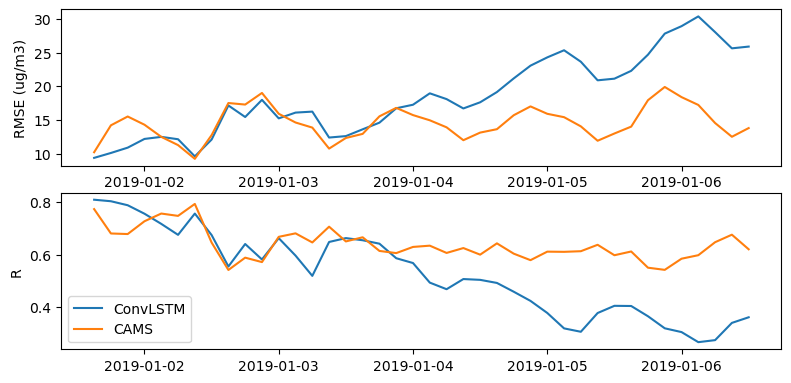

In [16]:
print(CC_pm2p5[4], CC_CAMS_pm2p5[4])

0.8468201798049506 0.8697814963058927


2019-01-01 12:00:00
/HDD/global/refer/refer-2019010112.npy
/DATA/global-emission-2_11-17_iniCAMS_iAOD/pred/start_2019010112/pred-2019010112.npy
/DATA/CAMS/cams_resample/start_2019010112/cams-2019010112.npy
/home/sc3020/OneDrive/Paper/Paper4/Nature/submittion2/Figures2_iAOD/compare_2019010112_pm2p5.png


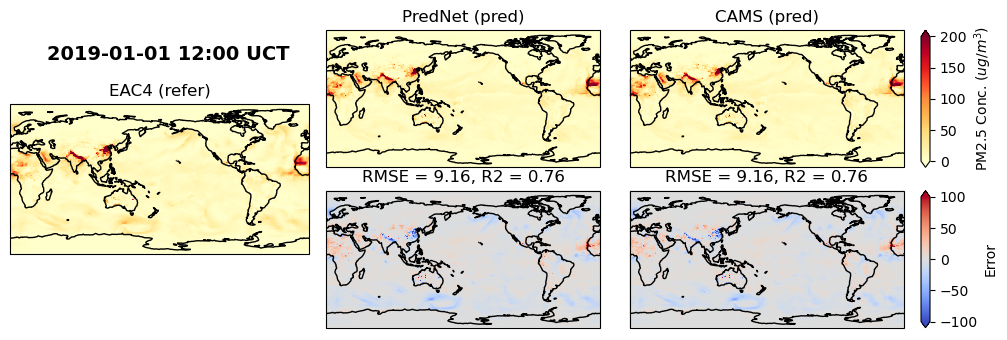

/HDD/global/refer/refer-2019010200.npy
/DATA/global-emission-2_11-17_iniCAMS_iAOD/pred/start_2019010112/pred-2019010200.npy
/DATA/CAMS/cams_resample/start_2019010112/cams-2019010200.npy
/home/sc3020/OneDrive/Paper/Paper4/Nature/submittion2/Figures2_iAOD/compare_2019010200_pm2p5.png


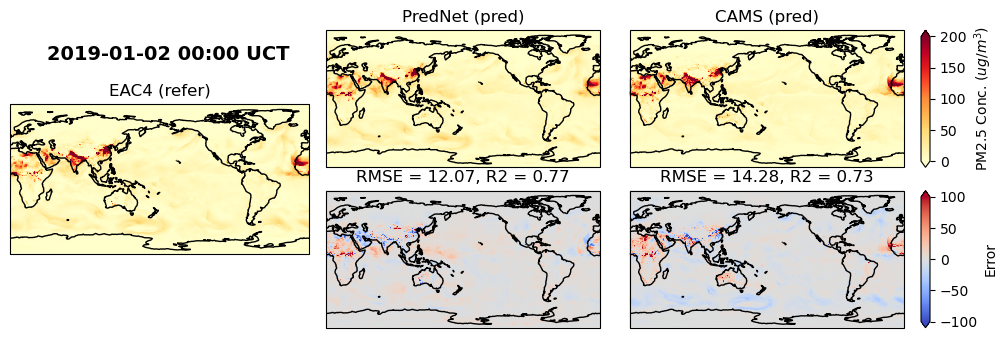

/HDD/global/refer/refer-2019010212.npy
/DATA/global-emission-2_11-17_iniCAMS_iAOD/pred/start_2019010112/pred-2019010212.npy
/DATA/CAMS/cams_resample/start_2019010112/cams-2019010212.npy
/home/sc3020/OneDrive/Paper/Paper4/Nature/submittion2/Figures2_iAOD/compare_2019010212_pm2p5.png


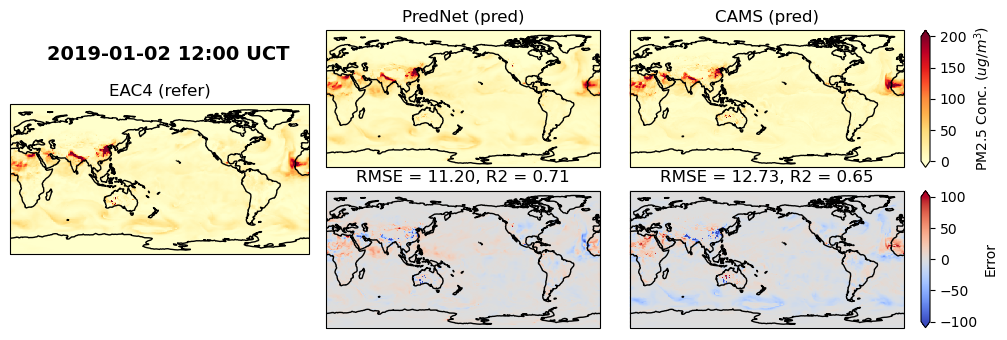

/HDD/global/refer/refer-2019010312.npy
/DATA/global-emission-2_11-17_iniCAMS_iAOD/pred/start_2019010112/pred-2019010312.npy
/DATA/CAMS/cams_resample/start_2019010112/cams-2019010312.npy
/home/sc3020/OneDrive/Paper/Paper4/Nature/submittion2/Figures2_iAOD/compare_2019010312_pm2p5.png


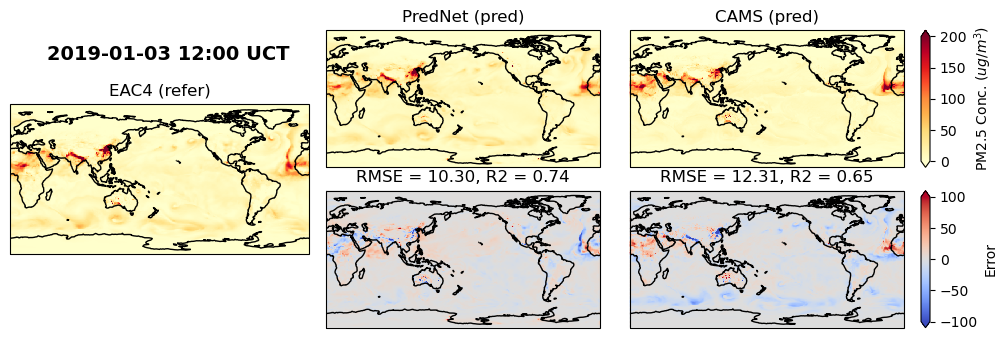

/HDD/global/refer/refer-2019010412.npy
/DATA/global-emission-2_11-17_iniCAMS_iAOD/pred/start_2019010112/pred-2019010412.npy
/DATA/CAMS/cams_resample/start_2019010112/cams-2019010412.npy
/home/sc3020/OneDrive/Paper/Paper4/Nature/submittion2/Figures2_iAOD/compare_2019010412_pm2p5.png


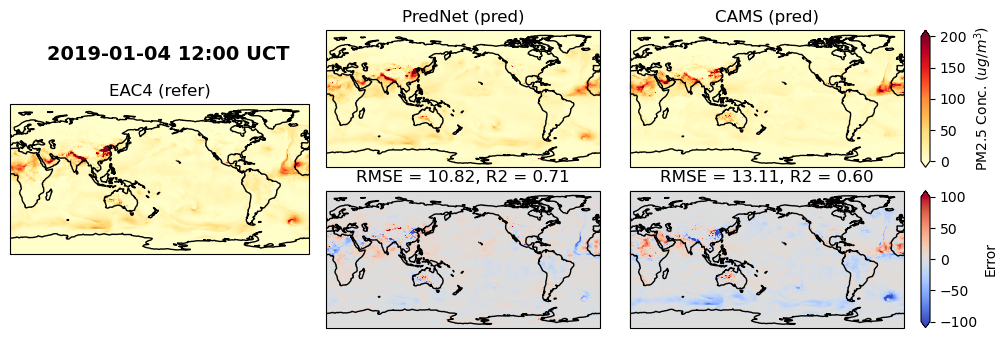

/HDD/global/refer/refer-2019010612.npy
/DATA/global-emission-2_11-17_iniCAMS_iAOD/pred/start_2019010112/pred-2019010612.npy
/DATA/CAMS/cams_resample/start_2019010112/cams-2019010612.npy
/home/sc3020/OneDrive/Paper/Paper4/Nature/submittion2/Figures2_iAOD/compare_2019010612_pm2p5.png


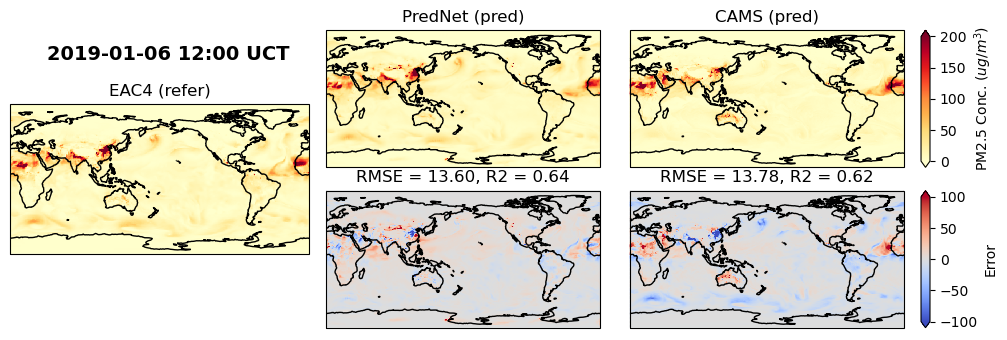

In [20]:
path_fig = '/home/sc3020/OneDrive/Paper/Paper4/Nature/submittion2/Figures2_iAOD/'
inpath_refer = "/HDD/global/refer/refer-{}.npy"

cmap = 'YlOrRd'
cmap_e = 'coolwarm'

index = 0
if index == 0:
    vmin = 0; vmax = 200; scale = 1e9; feature_name='pm2p5'; label_name = 'PM2.5 Conc. ($ug/m^3$)'
else:
    vmin = 0; vmax = 1; scale = 1; feature_name='aod550'; label_name = 'AOD550'
    
ratio = 0.5



from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

start = dates_eac4[4]
print(start)

for check_point in [0, 4, 8, 16, 24, 40]:
    
    current = start + timedelta(hours=3*check_point)
        
    # from EAC4 as reference
    filename = inpath_refer.format(current.strftime('%Y%m%d%H'))
    print(filename)
    refer = np.load(filename)
    
    # ConvLSTM prediction
    filename = path_pred.format(start.strftime('%Y%m%d%H'), current.strftime('%Y%m%d%H'))
    print(filename)
    pred = np.load(filename)
    
    # from CAMS - Physically-based model
    filename = path_cams.format(start.strftime('%Y%m%d%H'), current.strftime('%Y%m%d%H'))
    print(filename)
    cams = np.load(filename)
    
    rmse = np.sqrt(np.mean((refer[...,index] - pred[...,index])**2))*scale
    rmse_cams = np.sqrt(np.mean((refer[...,index] - cams[...,index])**2))*scale
    cc = np.corrcoef(refer[...,index].flatten(), pred[...,index].flatten())[0, 1]
    cc_cams = np.corrcoef(refer[...,index].flatten(), cams[...,index].flatten())[0, 1]
    
    fig = plt.figure(figsize=(10, 3.5))

    gs = GridSpec(2, 4, width_ratios=[1, 1, 1, 0.03])
    ax = fig.add_subplot(gs[:,0], projection=ccrs.PlateCarree(central_longitude=180))
    ax.set_global()
    ax.coastlines(color='k')
    ax.text(10,150,f"{current.strftime('%Y-%m-%d %H:00 UCT')}", fontsize=14, ha='center', va='center', weight='bold')
    ax.set_title('EAC4 (refer)')
    ax.pcolormesh(lon_eac4-180, lat_eac4, refer[...,index]*scale, vmin=vmin, vmax=vmax, cmap=cmap)
    
    ax = fig.add_subplot(gs[0,1], projection=ccrs.PlateCarree(central_longitude=180))
    ax.set_global()
    ax.coastlines(color='k')
    ax.set_title('PredNet (pred)')
    ax.pcolormesh(lon_eac4-180, lat_eac4, pred[...,index]*scale, vmin=vmin, vmax=vmax, cmap=cmap)
    
    ax = fig.add_subplot(gs[0,2], projection=ccrs.PlateCarree(central_longitude=180))
    ax.set_global()
    ax.coastlines(color='k')
    ax.set_title('CAMS (pred)')
    im = ax.pcolormesh(lon_eac4-180, lat_eac4, cams[...,index]*scale, vmin=vmin, vmax=vmax, cmap=cmap)
    
    ax = fig.add_subplot(gs[1,1], projection=ccrs.PlateCarree(central_longitude=180))
    ax.set_global()
    ax.coastlines(color='k')
    ax.set_title(f"RMSE = {rmse:.2f}, R2 = {(cc**2):.2f}")
    ax.pcolormesh(lon_eac4-180, lat_eac4, (pred[...,index]-refer[...,index])*scale, vmin=-vmax*ratio, vmax=vmax*ratio, cmap=cmap_e)
    
    ax = fig.add_subplot(gs[1,2], projection=ccrs.PlateCarree(central_longitude=180))
    ax.set_global()
    ax.coastlines(color='k')
    ax.set_title(f"RMSE = {rmse_cams:.2f}, R2 = {(cc_cams**2):.2f}")
    im_e = ax.pcolormesh(lon_eac4-180, lat_eac4, (cams[...,index]-refer[...,index])*scale, vmin=-vmax*ratio, vmax=vmax*ratio, cmap=cmap_e)
    
    cax = fig.add_subplot(gs[0, 3])
    cbar = plt.colorbar(im, cax=cax, extend='both', label=label_name)
    
    cax = fig.add_subplot(gs[1, 3])
    cbar = plt.colorbar(im_e, cax=cax, extend='both', label='Error')
    
    # plt.tight_layout()
    plt.subplots_adjust(wspace=0.02, hspace=0.17, left=0.01, right=0.93, top=0.9, bottom=0.05)
    
    filename = path_fig+'compare_{}_{}.png'.format(current.strftime('%Y%m%d%H'), feature_name)
    print(filename)
    fig.savefig(filename, dpi=300)
    plt.show()